# News Categories Classification Project

### Step 1: Loading Data

In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
import os
from pathlib import Path

In [5]:
path = Path('../data/raw')
print(type(path))

<class 'pathlib.WindowsPath'>


In [6]:
df = pd.read_csv(
    path/"news-categories.csv", 
    encoding = "ISO-8859-1"
)

In [7]:
df.head(3)

,News,Category
0,The IMF now expects China's economy to grow by...,Economy
1,Manufacturing activity in the Eurozone has dec...,Economy
2,Continued disruptions in the global supply cha...,Economy


### Step 2: Exploratory Data Analysis

There are 252 observations in this dataset. 

In [8]:
df.shape

(252, 2)

All features in this dataset are non-numeric.

In [9]:
df.dtypes

News        object
Category    object
dtype: object

There are 8 unique categories for each news title. 

In [11]:
df.describe()

,News,Category
count,252,252
unique,252,8
top,The IMF now expects China's economy to grow by...,Entertainment
freq,1,39


There are no null values in this dataset. 

In [12]:
df.isna().sum()

News        0
Category    0
dtype: int64

The 8 unique categories are: 

- Artifical Intelligence
- Economy
- Entertainment
- Food
- Health
- International Relations
- Politics
- Sports

In [13]:
category = set(df.Category)
category

{'Artificial Intelligence ',
 'Economy',
 'Entertainment',
 'Food',
 'Health',
 'International relations',
 'Politics',
 'Sports'}

In [14]:
counts = df.Category.value_counts(dropna=False)
counts

Category
Entertainment               39
Food                        36
Economy                     35
Sports                      32
International relations     32
Health                      27
Artificial Intelligence     27
Politics                    24
Name: count, dtype: int64

<Axes: title={'center': 'Items Per Category'}, xlabel='Category', ylabel='Count'>

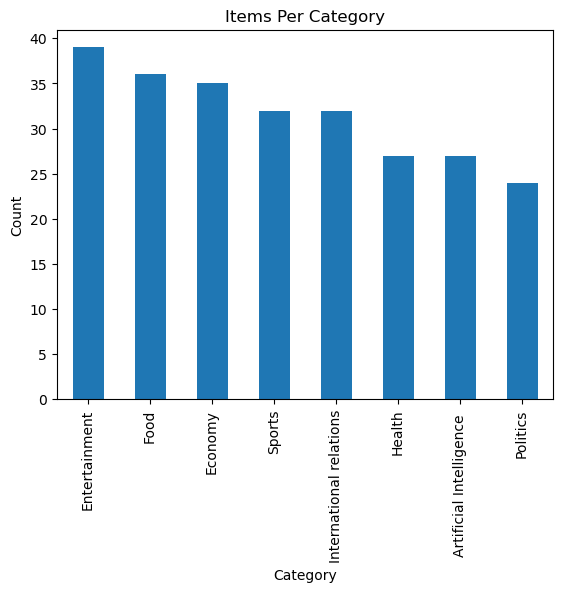

In [15]:
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Items Per Category')
counts.plot(kind="bar")

In [16]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

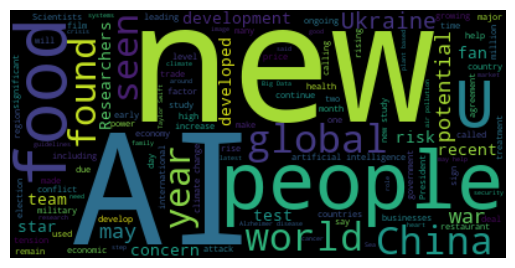

In [20]:
# Start with one review:
text = "".join([title for title in df.News])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()